In [2]:
import ROOT as r
import math
import array
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
from scipy.optimize import curve_fit

#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________

import CONFIG
import DBPARSE
from UTILITIES import *
from SIMFITS2D import DistributionFits2D
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend


Welcome to JupyROOT 6.26/06


In [3]:
#block id

In [4]:
pas="1"
config="3"

W2min=CONFIG.Function_JSON("W2min",f"../config/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/cuts{config}.cfg")
#dymin=-.984
#dymax=.9
#W2max=1.75
#dybgmin=-1.2
#dybgmax=1.2
dxmin=-2
dxmax=1
print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')

W2min: -0.5
W2max: 1.7
dxmin: -2
dxmax: 1
dymin: -0.5
dymax: 0.5
dybgmin: -1.3
dybgmax: 1.2
Coin Min: 88 Coin Max: 100


In [5]:
#bb.tr.n==1&&bb.ps.e>0.2&&abs(bb.tr.vz[0])<0.28&&bb.gem.track.nhits>3
#bb.tr.n==1&&bb.ps.e>0.2&&abs(bb.tr.vz[0])<0.28&&bb.gem.track.nhits>3&&abs(bb.etot_over_p-0.92)<0.2
#&&sbs.hcal.e>0.01&&bb.ps.e+bb.sh.e>1.7

In [6]:
import ROOT as r

import ROOT as r

def list_branches(rootfile_path, tree_name="Tout"):
    # Open the ROOT file
    root_file = r.TFile.Open(rootfile_path)
    
    # Check if the file was successfully opened
    if not root_file or root_file.IsZombie():
        print(f"Error: Could not open ROOT file '{rootfile_path}'.")
        return
    
    # Access the TTree
    tree = root_file.Get(tree_name)
    
    # Check if the tree exists
    if not tree:
        print(f"Error: Tree '{tree_name}' not found in file '{rootfile_path}'.")
        root_file.Close()
        return
    
    # Get the list of branches
    branch_list = tree.GetListOfBranches()
    
    # Print all branch names
    print(f"Branches in tree '{tree_name}':")
    for branch in branch_list:
        print(branch.GetName())
    
    # Close the ROOT file
    root_file.Close()

# Example usage
rootfile_path = "../outfiles/HCal_data_GEN3_sbs100p_nucleon_np_model1.root"
list_branches(rootfile_path)


Branches in tree 'Tout':
runnum
WCut
pCut
nCut
fiduCut
coinCut
ebeam
nu
Q2
W2
dpel
ephi
etheta
pcentral
vz
vx
vy
xtgt
ytgt
thtgt
phtgt
thetabend
xfp
yfp
thfp
phfp
trP
trPx
trPy
trPz
ePS
xPS
eSH
xSH
ySH
eHCAL
xHCAL
yHCAL
xHCAL_exp
yHCAL_exp
dx
dy
ngrinch_hits
xGRINCH
yGRINCH
coin_time
hcal_time
bbcal_time
nhodo_clus
hodo_time
BPMAx
BPMAy
Rasterx
Rastery
Raster2x
Raster2y
helicity
IHWP
pblkid
tdc
atime
hodotmean
nblk
mag
run
tar
cblkid
cblkatime
cblktime
cblke
nclus
cid
cx
cy
catime


Error in <TList::Clear>: A list is accessing an object (0x882f980) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x5010cb0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x50110e0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x90d1cc0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x90d2030) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x90d23a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x90d28d0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x90d2c90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x90d35f0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x90d39e0) alread

In [7]:


def Load_HCal(config):
    rootfile = f"../outfiles/HCal_data_GEN3_sbs100p_nucleon_np_model1.root"
    #rootfile = f"../outfiles/oldhcal.root"
    rootfile2=f"../outfiles/HCal_data_GEN3_sbs100p_nucleon_p_model1.root"
    C = r.TChain("Tout")
    C.Add(rootfile)
    C.SetBranchStatus("*", 0)
   
    
    #HCAL VARS_____________________________________
    C.SetBranchStatus("cx", 1)
    C.SetBranchStatus("cy", 1)
    C.SetBranchStatus("cblktime",1)
    C.SetBranchStatus("cblkatime",1)
    C.SetBranchStatus("cblkid",1)
    C.SetBranchStatus("cblke",1)
    C.SetBranchStatus("tdc",1)
    C.SetBranchStatus("atime",1)
    C.SetBranchStatus("bbcal_time",1)

    C.SetBranchStatus("pblkid",1)
    
    bbtime=array.array('d',[0])
    tdc=array.array('d',[0])
    atime=array.array('d',[0])
    pblkid=array.array('d',[0])
    cx = array.array('d', [0]*10) 
    cy = array.array('d', [0]*10) 
    cblktime=array.array('d',[0]*25)
    cblkatime=array.array('d',[0]*25)
    cblkid=array.array('d',[0]*25)
    cblke=array.array('d',[0]*25)
    
    C.SetBranchAddress("cx", cx)
    C.SetBranchAddress("cy", cy)
    C.SetBranchAddress("cblktime",cblktime)
    C.SetBranchAddress("cblkatime",cblkatime)
    C.SetBranchAddress("cblkid",cblkid)
    C.SetBranchAddress("cblke",cblke)
    C.SetBranchAddress("tdc",tdc)
    C.SetBranchAddress("atime",atime)
    C.SetBranchAddress("pblkid",pblkid)
    C.SetBranchAddress("bbcal_time",bbtime)
    #_____________________________________
    
    
    #CUT VARS_____________________________________
    C.SetBranchStatus("W2",1)
    C.SetBranchStatus("dx",1)
    C.SetBranchStatus("dy",1)
    
    W2=array.array('d',[0])
    dx=array.array('d',[0])
    dy=array.array('d',[0])
    
    C.SetBranchAddress("W2",W2)
    C.SetBranchAddress("dx",dx)
    C.SetBranchAddress("dy",dy)
    
    #_____________________________________
    
    cx_array=[]
    cy_array=[]
    cblktime_array=[]
    cblkatime_array=[]
    cblkid_array=[]
    cblke_array=[]
    tdc_array=[]
    bbtime_array=[]
    atime_array=[]
    pblkid_array=[]
    target=[]
    
    C.GetEntry(0)
    Entries=C.GetEntries()
    passedcut=0
    for i in range(0,Entries):
        
        C.GetEntry(i)
           
        #cut----------------
        wcut=W2min<W2[0]<W2max
        dxcut=dxmin<dx[0]<dxmax
        dycut=dymin<dy[0]<dymax
        cut=wcut and dxcut and dycut
        cut = wcut and dycut
        #-------------------
        
        if cut:
            passedcut+=1
            cx_array.append(cx)
            cy_array.append(cy)
            tdc_array.append(tdc[0])
            bbtime_array.append(bbtime[0])
            atime_array.append(atime[0])

            pblkid_array.append(pblkid[0])
            cblktime_array.append(cblktime)
            cblkatime_array.append(cblkatime)

            cblkid_array.append(cblkid)
            cblke_array.append(cblke)
            target.append(0)
    
    
    
    
    
    
    D = r.TChain("Tout")
    D.Add(rootfile2)
    D.SetBranchStatus("*", 0)
   
    
    #HCAL VARS_____________________________________
    D.SetBranchStatus("cx", 1)
    D.SetBranchStatus("cy", 1)
    D.SetBranchStatus("cblktime",1)
    D.SetBranchStatus("cblkatime",1)
    D.SetBranchStatus("cblkid",1)
    D.SetBranchStatus("cblke",1)
    D.SetBranchStatus("tdc",1)
    D.SetBranchStatus("bbcal_time",1)
    D.SetBranchStatus("atime",1)
    D.SetBranchStatus("pblkid",1)

    tdc2=array.array('d',[0])
    bbtime2=array.array('d',[0])
    atime2=array.array('d',[0])

    pblkid2=array.array('d',[0])
    cx2 = array.array('d', [0]*10) 
    cy2 = array.array('d', [0]*10) 
    cblktime2=array.array('d',[0]*25)
    cblkatime2=array.array('d',[0]*25)
    cblkid2=array.array('d',[0]*25)
    cblke2=array.array('d',[0]*25)
    
    D.SetBranchAddress("cx", cx2)
    D.SetBranchAddress("cy", cy2)
    D.SetBranchAddress("cblktime",cblktime2)
    D.SetBranchAddress("cblkatime",cblkatime2)
    D.SetBranchAddress("cblkid",cblkid2)
    D.SetBranchAddress("cblke",cblke2)
    D.SetBranchAddress("tdc",tdc2)
    D.SetBranchAddress("bbcal_time",bbtime2)
    D.SetBranchAddress("atime",atime2)

    D.SetBranchAddress("pblkid",pblkid2)
    #_____________________________________
    
    
    #CUT VARS_____________________________________
    D.SetBranchStatus("W2",1)
    D.SetBranchStatus("dx",1)
    D.SetBranchStatus("dy",1)
    
    W22=array.array('d',[0])
    dx2=array.array('d',[0])
    dy2=array.array('d',[0])
    
    D.SetBranchAddress("W2",W22)
    D.SetBranchAddress("dx",dx2)
    D.SetBranchAddress("dy",dy2)
    
    #_____________________________________
    

    
    
    D.GetEntry(0)
    Entries=D.GetEntries()
    for i in range(0,Entries):
        
        D.GetEntry(i)
           
        #cut----------------
        wcut=W2min<W22[0]<W2max
        dxcut=dxmin<dx2[0]<dxmax
        dycut=dymin<dy2[0]<dymax
        cut=wcut and dycut and dxcut
        
        #-------------------
        
        if cut:
            passedcut+=1
            cx_array.append(cx2)
            cy_array.append(cy2)
            tdc_array.append(tdc2[0])
            bbtime_array.append(bbtime2[0])
            atime_array.append(atime2[0])

            pblkid_array.append(pblkid2[0])
            cblktime_array.append(cblktime2)
            cblkatime_array.append(cblkatime2)

            cblkid_array.append(cblkid2)
            cblke_array.append(cblke2)
            target.append(1)
    print(f"Events Passing Cut: {passedcut}")
    HCalArrays=[cx_array,cy_array,cblktime_array,cblkid_array,cblke_array,tdc_array,pblkid_array,cblkatime_array
                ,atime_array,target,bbtime_array]
    return HCalArrays

# To run the function


In [8]:
HCalArrays=Load_HCal("3")
#y=np.array(y)

Events Passing Cut: 436630


Error in <TList::Clear>: A list is accessing an object (0x9750f80) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9b2aca0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x97dc450) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9b2edd0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x6274c30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x8ff8160) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9b2f880) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x9b311f0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x97cfaa0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x97d7e00) alread

In [18]:
cblktime=np.array(HCalArrays[2])
atime_array=np.array(HCalArrays[7])
cblkid=np.array(HCalArrays[3]).astype(int)
e_array=np.array(HCalArrays[4])
tdc_array=np.array(HCalArrays[5])
pblkid_array=np.array(HCalArrays[6]).astype(int)
adc_array=np.array(HCalArrays[8])
target_array=np.array(HCalArrays[9]).astype(int)
bbtime_array=np.array(HCalArrays[10])

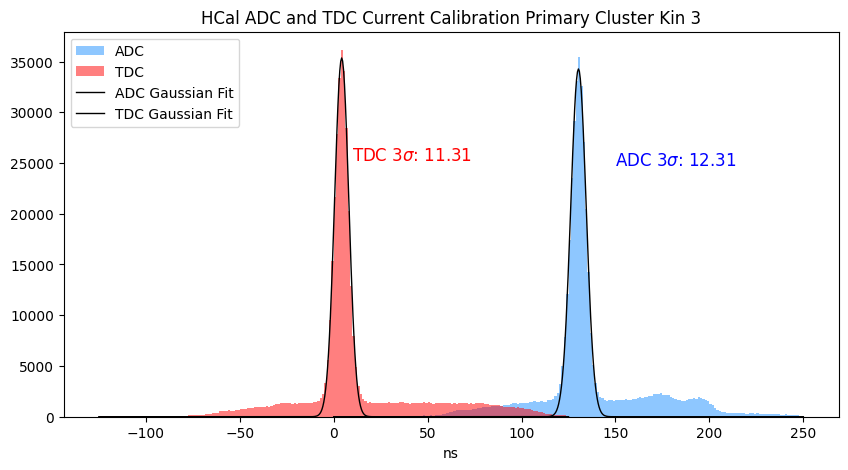

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy.polynomial.polynomial import Polynomial

def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

def polynomial(x, a, b, c):
    return a * x**2 + b * x + c
plt.figure(figsize=(10,5))
adcHist = plt.hist(adc_array, bins=200, range=(0, 250), color='dodgerblue', alpha=0.5, label="ADC")
tdcHist = plt.hist(tdc_array, bins=200, range=(-125, 125), color='red', alpha=0.5, label="TDC")

adc_counts, adc_bins = adcHist[0], adcHist[1]
tdc_counts, tdc_bins = tdcHist[0], tdcHist[1]

adc_bin_centers = (adc_bins[:-1] + adc_bins[1:]) / 2
tdc_bin_centers = (tdc_bins[:-1] + tdc_bins[1:]) / 2

adc_initial_guess = [max(adc_counts), adc_bin_centers[np.argmax(adc_counts)], np.std(adc_array)]
popt_gauss_adc, _ = curve_fit(gaussian, adc_bin_centers, adc_counts, p0=adc_initial_guess)
popt_poly_adc, _ = curve_fit(polynomial, adc_bin_centers, adc_counts)

tdc_initial_guess = [max(tdc_counts), tdc_bin_centers[np.argmax(tdc_counts)], np.std(tdc_array)]
popt_gauss_tdc, _ = curve_fit(gaussian, tdc_bin_centers, tdc_counts, p0=tdc_initial_guess)
popt_poly_tdc, _ = curve_fit(polynomial, tdc_bin_centers, tdc_counts)

x_adc = np.linspace(0, 250, 500)
plt.plot(x_adc, gaussian(x_adc, *popt_gauss_adc), color='black', lw=1, label="ADC Gaussian Fit")

x_tdc = np.linspace(-125, 125, 500)
plt.plot(x_tdc, gaussian(x_tdc, *popt_gauss_tdc), color='black', lw=1, label="TDC Gaussian Fit")

plt.text(150, max(adc_counts)*0.7, f"ADC 3$\sigma$: {abs(3*popt_gauss_adc[2]):.2f}", color='blue', fontsize=12)
plt.text(10, max(tdc_counts)*0.7, f"TDC 3$\sigma$: {abs(3*popt_gauss_tdc[2]):.2f}", color='red', fontsize=12)

plt.title("HCal ADC and TDC Current Calibration Primary Cluster Kin 3")
plt.xlabel("ns")
plt.legend(loc="upper left")
plt.show()


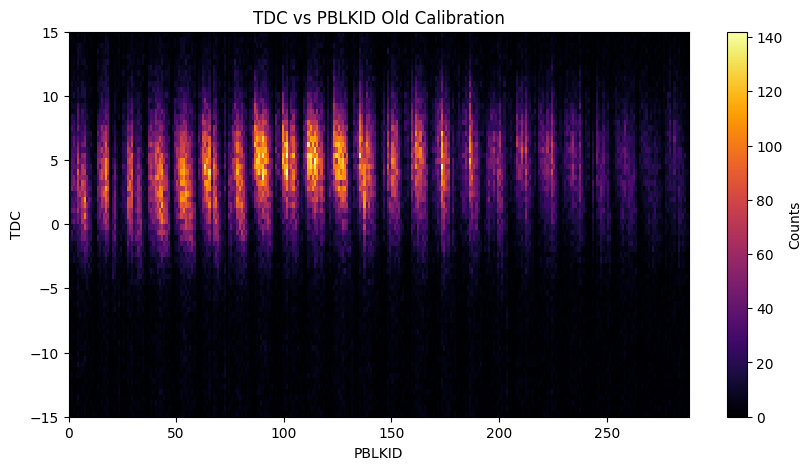

In [20]:

colors = ['white', 'dodgerblue','mediumaquamarine','gold','yellow']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

plt.figure(figsize=(10,5))
plt.hist2d(pblkid_array, tdc_array, bins=[288, 70], range=[[0, 288], [-15, 15]], cmap='viridis')

plt.colorbar(label='Counts')

plt.xlim(0, 288)
plt.ylim(-15, 15)

plt.xlabel('PBLKID')
plt.ylabel('TDC')
plt.title('TDC vs PBLKID Old Calibration')

plt.show()


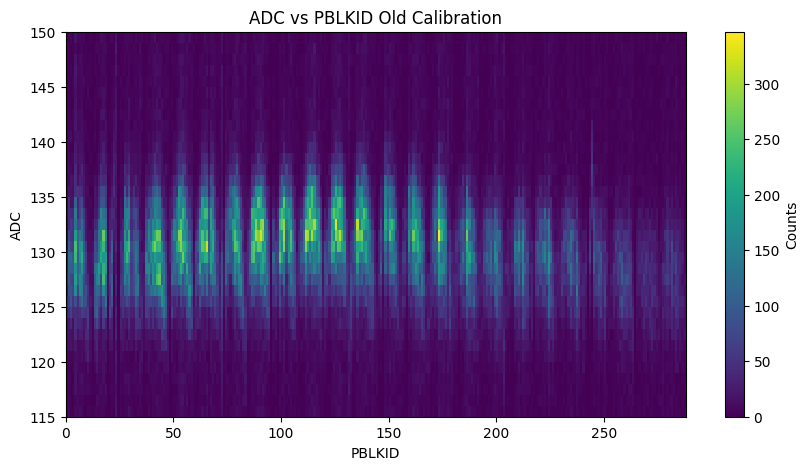

In [79]:
plt.figure(figsize=(10,5))
plt.hist2d(pblkid_array, adc_array, bins=[288, 35], range=[[0, 288], [115, 150]], cmap='viridis')

plt.colorbar(label='Counts')

plt.xlim(0, 288)

plt.xlabel('PBLKID')
plt.ylabel('ADC')
plt.title('ADC vs PBLKID Old Calibration')

plt.show()

(array([420800.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  15830.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

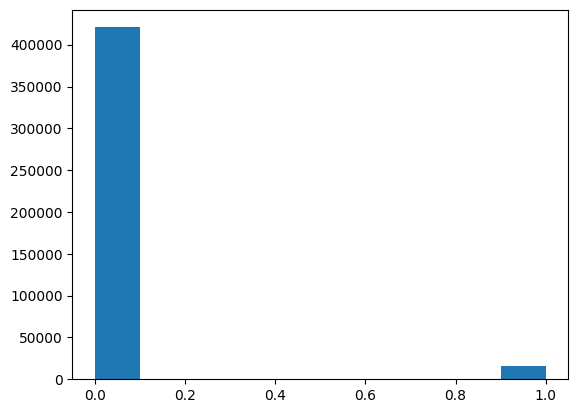

In [22]:
plt.hist(target_array,range=(0,1))

# TDC_____________________________________________________

In [23]:
tdc_array

array([ 7.410704,  8.35744 ,  1.690416, ..., 10.38632 , 10.224144,
        8.391712])

In [24]:

# Initialize 288 histograms
histograms = [[] for _ in range(288)]


# Fill the histograms
for pblkid, tdc_value in zip(pblkid_array, tdc_array):
    # pblkid ranges from 1 to 288, so subtract 1 to make it 0-indexed
    try:
        histograms[pblkid - 1].append(tdc_value)
    except:
        print("Error wtih pblkid")


Error wtih pblkid
Error wtih pblkid
Error wtih pblkid
Error wtih pblkid
Error wtih pblkid
Error wtih pblkid


In [25]:

# Initialize 288 histograms
histogramsADC = [[] for _ in range(288)]


# Fill the histograms
for pblkid, adc_value in zip(pblkid_array, adc_array):
    # pblkid ranges from 1 to 288, so subtract 1 to make it 0-indexed
    try:
        histogramsADC[pblkid - 1].append(adc_value)
    except:
        print("Error wtih pblkid")


Error wtih pblkid
Error wtih pblkid
Error wtih pblkid
Error wtih pblkid
Error wtih pblkid
Error wtih pblkid


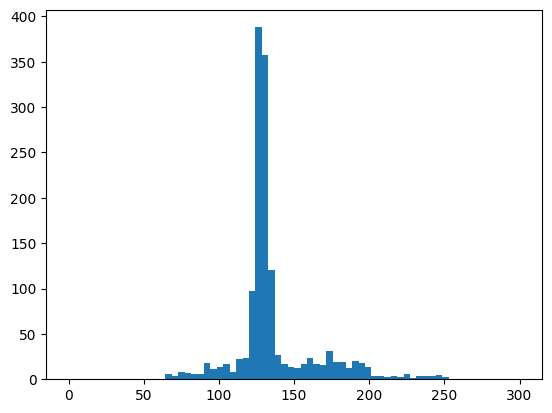

In [26]:
o=plt.hist(histogramsADC[20],range=(-0,300),bins=70)

In [27]:
def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))


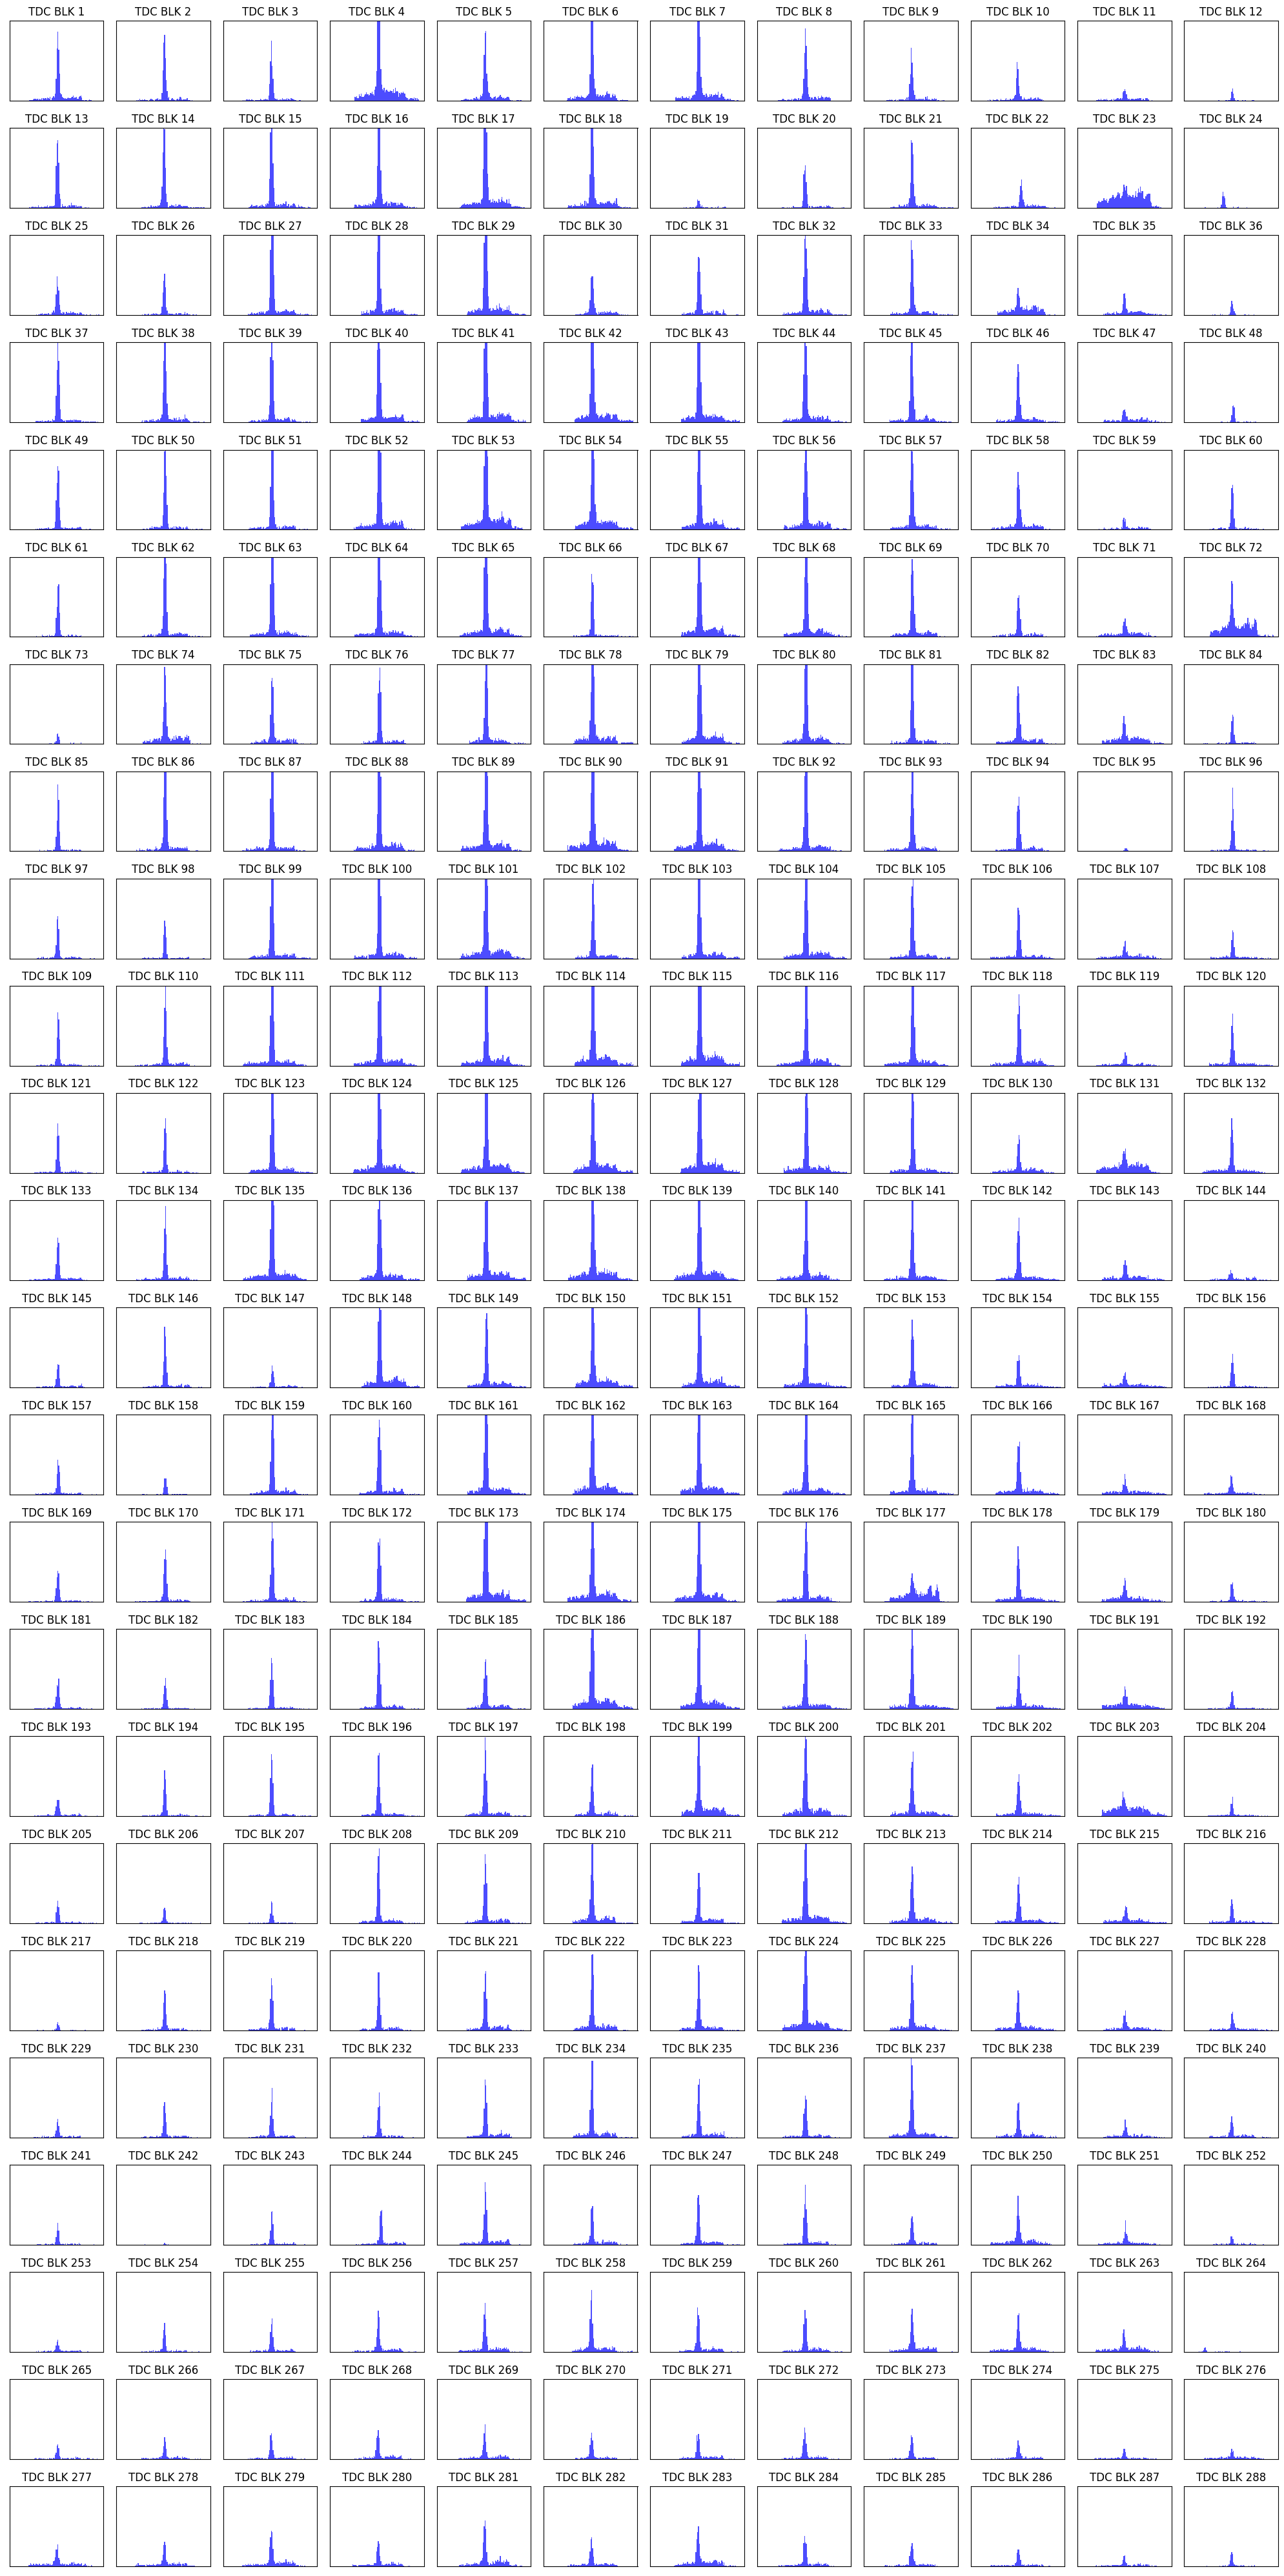

In [28]:
import numpy as np
import matplotlib.pyplot as plt


num_bins = 20

rows, cols = 24, 12

fig, axes = plt.subplots(rows, cols, figsize=(20, 40)) 

mode_array=[]
for i in range(rows):
    for j in range(cols):
        idx = i * cols + j  
        ax = axes[i, j]
        
        counts, bin_edges, _ = ax.hist(histogramsADC[idx], bins=100,range=(0,250), color='blue', alpha=0.7)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        mode_value = bin_centers[np.argmax(counts)]
        mode_array.append(mode_value)
        
        
        ax.set_title(f"TDC BLK {idx+1}")
        ax.set_ylim(0, 300)
        ax.set_xticks([]) 
        ax.set_yticks([])  

plt.tight_layout()
plt.show()




In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, to_rgba
from matplotlib.cm import ScalarMappable, inferno# Assuming `histograms` is the list of filled histograms from earlier

num_bins = 20

rows, cols = 24, 12

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 40), dpi=300)  # Adjust figsize for better visibility

colormap = plt.cm.inferno
normalizer = Normalize(vmin=0, vmax=2000)  # Adjust the max value based on your data range
mode_array = []
for i in range(rows):
    for j in range(cols):
        idx = i * cols + j  # Calculate the index for the histogram
        ax = axes[i, j]
        
        counts, bin_edges, _ = ax.hist(histograms[idx], bins=100, range=(-100, 200), color='black', alpha=1)
        
        total_events = counts.sum()

        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        mode_value = bin_centers[np.argmax(counts)]
        mode_array.append(mode_value)
        bgcolor = to_rgba(colormap(normalizer(total_events)), alpha=0.3)  # Set alpha to 0.5 or any other fixed value

        ax.set_facecolor(bgcolor)
        
        ax.set_title(f"TDC BLK {idx+1}", fontsize=8)
        ax.set_ylim(0, 300)
        ax.set_xticks([])  # Optional: Remove x-ticks for cleaner layout
        ax.set_yticks([])  # Optional: Remove y-ticks for cleaner layout



plt.tight_layout()
plt.show()


# Fit with Gaussian

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

num_bins = 20

rows, cols = 24, 12

fig, axes = plt.subplots(rows, cols, figsize=(20, 40),dpi=300)  # Adjust figsize for better visibility

mean_array = []

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j  # Calculate the index for the histogram
        ax = axes[i, j]
        
        counts, bin_edges, _ = ax.hist(histograms[idx], bins=100, range=(-200, 200), color='blue', alpha=0.7)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        filtered_indices = counts > 10
        filtered_counts = counts[filtered_indices]
        filtered_bin_centers = bin_centers[filtered_indices]
        
        if len(filtered_counts) > 0:
            initial_guess = [max(filtered_counts), filtered_bin_centers[np.argmax(filtered_counts)], np.std(histograms[idx])]
            
            try:
                popt, _ = curve_fit(gaussian, filtered_bin_centers, filtered_counts, p0=initial_guess)
                
                mean_value = popt[1]
                mean_array.append(mean_value)
                
                ax.plot(bin_centers, gaussian(bin_centers, *popt), color='red', lw=2)
                
                
                ax.set_title(f"TDC BLK {idx+1}\nMean: {mean_value:.2f}")
            except:
                mean_array.append(100)
                ax.set_title(f"TDC BLK {idx+1}\nFit Failed")
        else:
            mean_array.append(100)
            ax.set_title(f"TDC BLK {idx+1}\nInsufficient Data")
        ax.set_ylim(0, 300)
        ax.set_xticks([])  # Optional: Remove x-ticks for cleaner layout
        ax.set_yticks([])  # Optional: Remove y-ticks for cleaner layout

plt.tight_layout()
plt.savefig("high_res_histograms.png", dpi=300)

plt.show()


/home/research/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [31]:
histograms_to_refit = [19-1, 23-1, 34-1,47-1,72-1,73-1,83-1,131-1,144-1,177-1,179-1,191-1,203-1,242-1,244-1,263-1,276-1]  # Replace with the actual histogram indices you want to refit


# ADC

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

num_bins = 20

rows, cols = 24, 12

fig, axes = plt.subplots(rows, cols, figsize=(20, 40),dpi=300)  # Adjust figsize for better visibility

mean_arrayADC = []

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j  # Calculate the index for the histogram
        ax = axes[i, j]
        
        counts, bin_edges, _ = ax.hist(histogramsADC[idx], bins=100, range=(-200, 200), color='blue', alpha=0.7)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        filtered_indices = counts > 10
        filtered_counts = counts[filtered_indices]
        filtered_bin_centers = bin_centers[filtered_indices]
        
        if len(filtered_counts) > 0:
            initial_guess = [max(filtered_counts), filtered_bin_centers[np.argmax(filtered_counts)], np.std(histogramsADC[idx])]
            
            try:
                popt, _ = curve_fit(gaussian, filtered_bin_centers, filtered_counts, p0=initial_guess)
                
                mean_value = popt[1]
                mean_arrayADC.append(mean_value)
                
                ax.plot(bin_centers, gaussian(bin_centers, *popt), color='red', lw=2)
                
                
                ax.set_title(f"ADC BLK {idx+1}\nMean: {mean_value:.2f}")
            except:
                mean_arrayADC.append(100)
                ax.set_title(f"ADC BLK {idx+1}\nFit Failed")
        else:
            mean_arrayADC.append(100)
            ax.set_title(f"ADC BLK {idx+1}\nInsufficient Data")
        ax.set_ylim(0, 300)
        ax.set_xticks([])  # Optional: Remove x-ticks for cleaner layout
        ax.set_yticks([])  # Optional: Remove y-ticks for cleaner layout

plt.tight_layout()
plt.savefig("high_res_histograms.png", dpi=300)

plt.show()


# Refitting

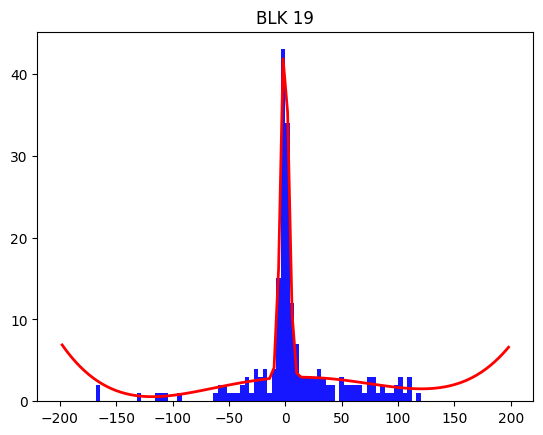

Histogram 19:
Amplitude (Gaussian): 42.129547069399635
Mean (mu, Gaussian): -0.5839487814737957
Standard Deviation (sigma, Gaussian): 3.5683111121202957


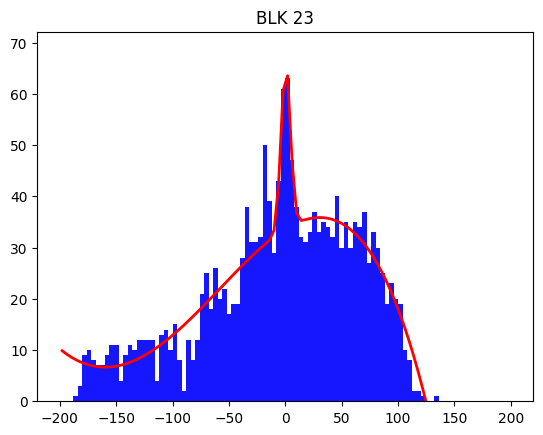

Histogram 23:
Amplitude (Gaussian): 32.18304228795631
Mean (mu, Gaussian): 0.3460476611352455
Standard Deviation (sigma, Gaussian): 4.0873327201765415


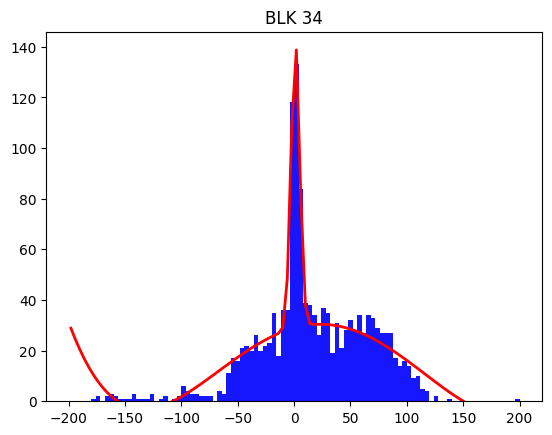

Histogram 34:
Amplitude (Gaussian): 112.36090217937249
Mean (mu, Gaussian): 1.134999418411872
Standard Deviation (sigma, Gaussian): 3.8656508889392276


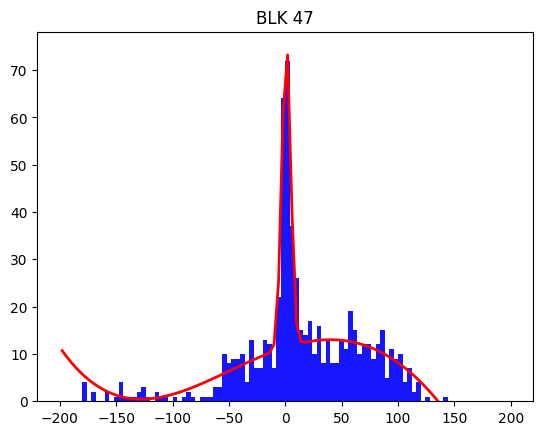

Histogram 47:
Amplitude (Gaussian): 64.43382729601318
Mean (mu, Gaussian): 0.8283517942813299
Standard Deviation (sigma, Gaussian): -3.946584948765515


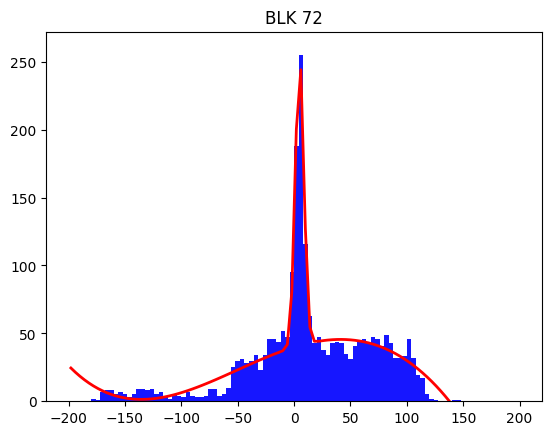

Histogram 72:
Amplitude (Gaussian): 212.20906573813468
Mean (mu, Gaussian): 4.856239456079123
Standard Deviation (sigma, Gaussian): 3.8001370957374014


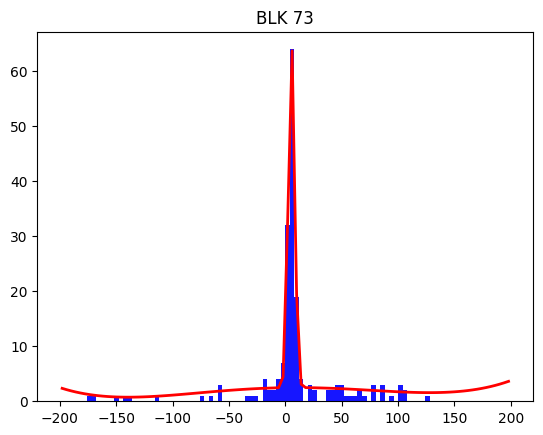

Histogram 73:
Amplitude (Gaussian): 62.515109566807006
Mean (mu, Gaussian): 5.424818216482986
Standard Deviation (sigma, Gaussian): -2.8297265704657706


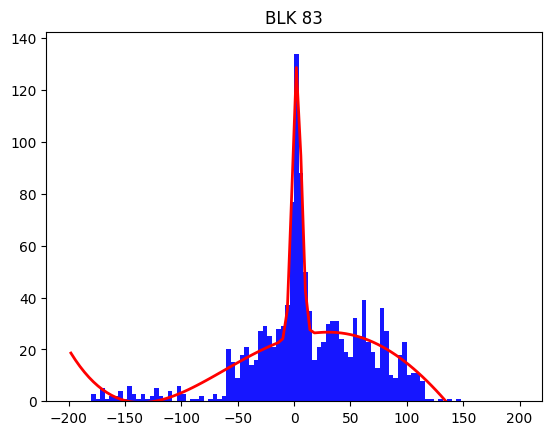

Histogram 83:
Amplitude (Gaussian): 104.30157702925648
Mean (mu, Gaussian): 2.3970127871754827
Standard Deviation (sigma, Gaussian): -3.987078007023897


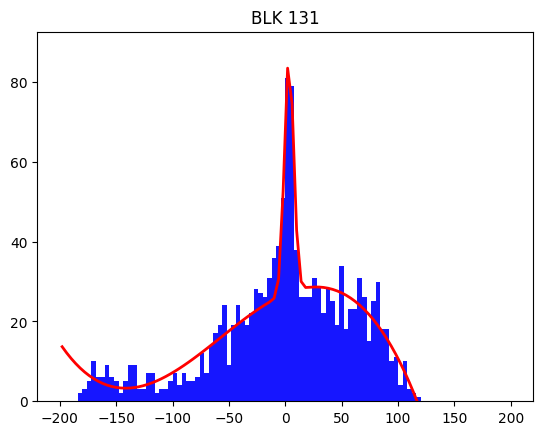

Histogram 131:
Amplitude (Gaussian): 58.99034442263573
Mean (mu, Gaussian): 3.238741305652915
Standard Deviation (sigma, Gaussian): 4.077589428378631


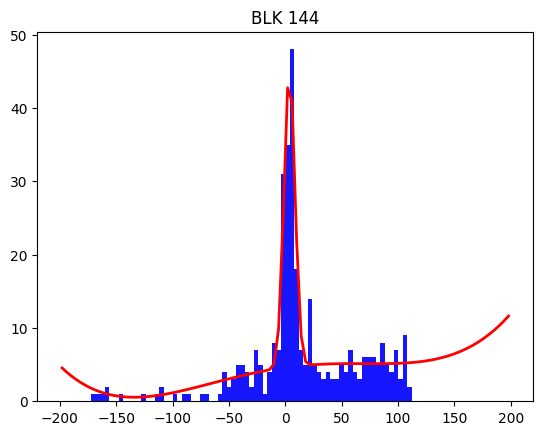

Histogram 144:
Amplitude (Gaussian): 40.491462972538514
Mean (mu, Gaussian): 3.679647012512902
Standard Deviation (sigma, Gaussian): -4.825356684908117


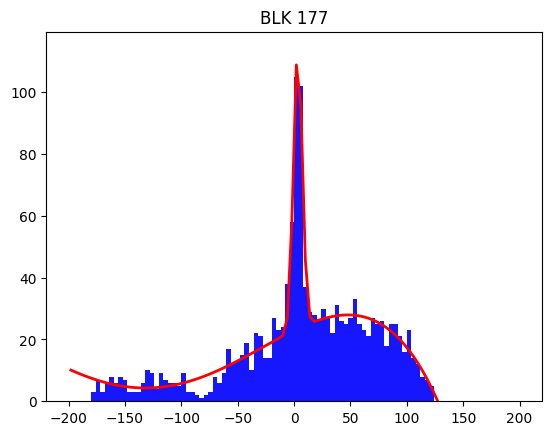

Histogram 177:
Amplitude (Gaussian): 90.69660814067592
Mean (mu, Gaussian): 3.3263664955731373
Standard Deviation (sigma, Gaussian): 3.899643205613089


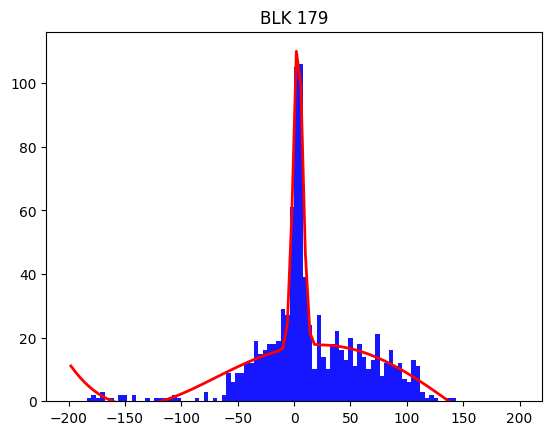

Histogram 179:
Amplitude (Gaussian): 98.70608930934115
Mean (mu, Gaussian): 3.451732607268841
Standard Deviation (sigma, Gaussian): -4.175583163212624


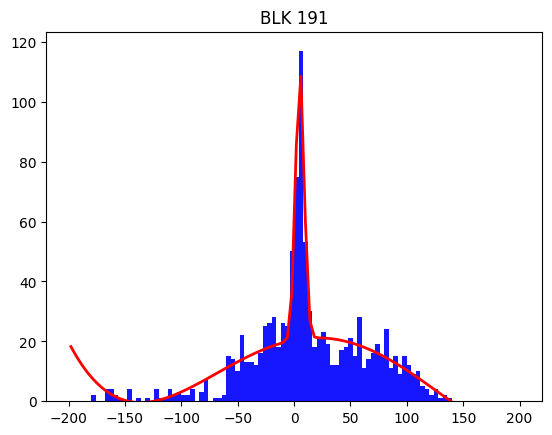

Histogram 191:
Amplitude (Gaussian): 90.30047902770762
Mean (mu, Gaussian): 5.074996848130154
Standard Deviation (sigma, Gaussian): -3.814858474121708


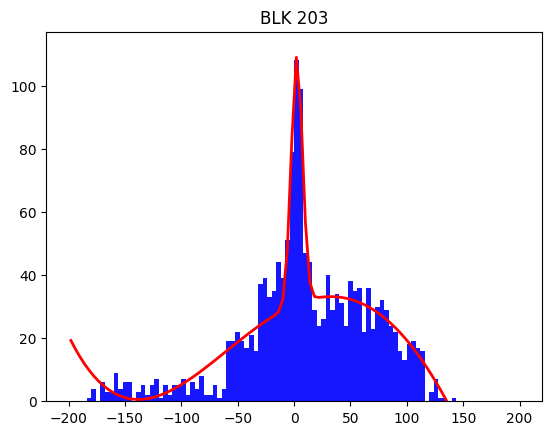

Histogram 203:
Amplitude (Gaussian): 78.5228450097986
Mean (mu, Gaussian): 2.459734684929249
Standard Deviation (sigma, Gaussian): 4.986310747760328
Not enough data points for fitting histogram 242. Skipping this histogram.


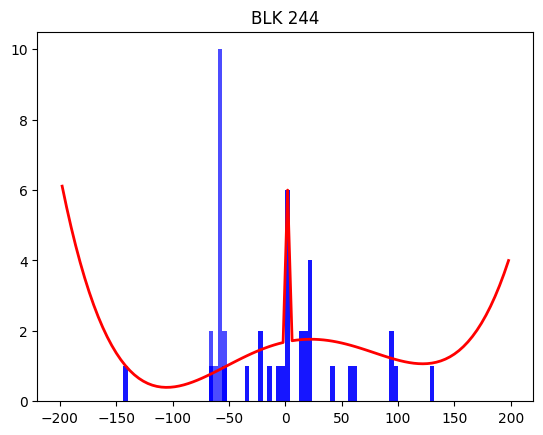

Histogram 244:
Amplitude (Gaussian): 5.726277632208818
Mean (mu, Gaussian): 2.5206042877697343
Standard Deviation (sigma, Gaussian): 0.6886721084963485


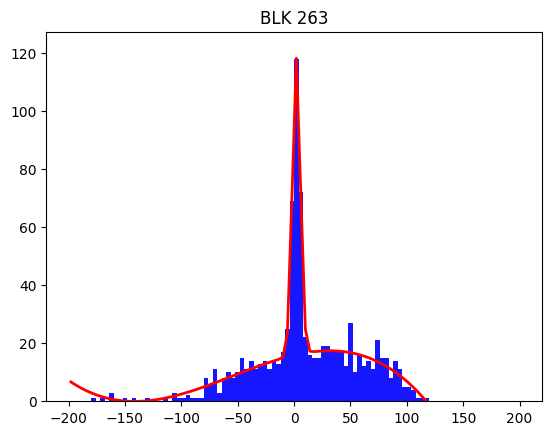

Histogram 263:
Amplitude (Gaussian): 102.21619540743794
Mean (mu, Gaussian): 2.025424821204367
Standard Deviation (sigma, Gaussian): 3.549015316043957


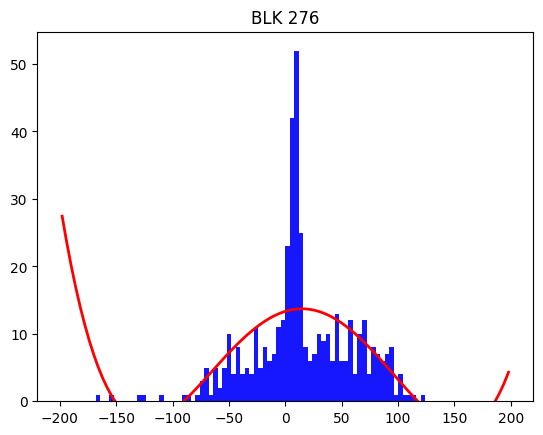

Histogram 276:
Amplitude (Gaussian): 37.308829263116664
Mean (mu, Gaussian): 505.2447098313998
Standard Deviation (sigma, Gaussian): 1067.0736108006356


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the combined Gaussian + 4th-order polynomial function
def poly_gaussian(x, amp, mu, sigma, a, b, c, d, e):
    gaussian_part = amp * np.exp(-(x - mu)**2 / (2 * sigma**2))
    polynomial_part = a * x**4 + b * x**3 + c * x**2 + d * x + e  # 4th-order polynomial
    return gaussian_part + polynomial_part

# List of histogram indices to refit
refitI = [19-1, 23-1, 34-1, 47-1, 72-1, 73-1, 83-1, 131-1, 144-1, 177-1, 179-1, 191-1, 203-1, 242-1, 244-1, 263-1, 276-1]

# Iterate over the histograms to refit
fitParam=[]

for i in range(len(refitI)):
    counts, bin_edges, _ = plt.hist(histograms[refitI[i]], bins=100, range=(-200, 200), color='blue', alpha=0.7)
    plt.title(f"BLK {refitI[i]+1}")

    # Calculate bin centers from bin edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Filter out bins where counts are less than 10
    filtered_indices = counts > 0
    filtered_counts = counts[filtered_indices]
    filtered_bin_centers = bin_centers[filtered_indices]

    # Ensure we have enough data points for fitting (at least 8 points, as we're fitting 8 parameters)
    if len(filtered_counts) < 8:
        print(f"Not enough data points for fitting histogram {refitI[i]+1}. Skipping this histogram.")
        continue

    # Initial guess for the parameters: [amplitude, mean, standard deviation, a, b, c, d, e]
    initial_guess = [max(filtered_counts), filtered_bin_centers[np.argmax(filtered_counts)], np.std(histograms[144-1]), 0, 0, 0, 0, 0]

    # Fit the 4th-order polynomial + Gaussian function to the filtered histogram data
    try:
        popt, _ = curve_fit(poly_gaussian, filtered_bin_centers, filtered_counts, p0=initial_guess)
    except RuntimeError as e:
        plt.show()
        print(f"Fit failed for histogram {refitI[i]+1}: {e}")
        continue

    # Plot the histogram
    plt.hist(histograms[refitI[i]], bins=100, range=(-200, 200), color='blue', alpha=0.7)

    # Plot the combined 4th-order polynomial + Gaussian fit
    plt.plot(bin_centers, poly_gaussian(bin_centers, *popt), color='red', lw=2)

    # Set y-limit to prevent the curve from going negative
    plt.ylim(bottom=0)

    # Show the plot
    plt.show()

    # Print the parameters of the fitted Gaussian and polynomial
    print(f"Histogram {refitI[i]+1}:")
    print(f"Amplitude (Gaussian): {popt[0]}")
    print(f"Mean (mu, Gaussian): {popt[1]}")
    print(f"Standard Deviation (sigma, Gaussian): {popt[2]}")
    fitParam.append([refitI[i],popt[1],popt[2]])
    



In [34]:
fitParam

[[18, -0.5839487814737957, 3.5683111121202957],
 [22, 0.3460476611352455, 4.0873327201765415],
 [33, 1.134999418411872, 3.8656508889392276],
 [46, 0.8283517942813299, -3.946584948765515],
 [71, 4.856239456079123, 3.8001370957374014],
 [72, 5.424818216482986, -2.8297265704657706],
 [82, 2.3970127871754827, -3.987078007023897],
 [130, 3.238741305652915, 4.077589428378631],
 [143, 3.679647012512902, -4.825356684908117],
 [176, 3.3263664955731373, 3.899643205613089],
 [178, 3.451732607268841, -4.175583163212624],
 [190, 5.074996848130154, -3.814858474121708],
 [202, 2.459734684929249, 4.986310747760328],
 [243, 2.5206042877697343, 0.6886721084963485],
 [262, 2.025424821204367, 3.549015316043957],
 [275, 505.2447098313998, 1067.0736108006356]]

In [35]:
for i in range(0,len(fitParam)):
    mean_array[fitParam[i][0]]=fitParam[i][1]

# Mean Values in Grid Format

### TDC

In [36]:
new_offset = np.nan_to_num(np.array(mean_array), nan=100)
reshaped_array = new_offset.reshape(24, 12)

# Print the array in the desired format
for row in reshaped_array:
    formatted_row = ' '.join(f"{num:.2f}" for num in row)  # Format each number to 2 decimal places
    print(formatted_row)

3.64 3.74 3.31 3.88 2.72 2.86 2.39 1.54 1.81 1.79 1.78 2.55
4.16 3.83 4.08 3.86 3.85 3.72 -0.58 1.06 2.18 -197.34 0.35 1.09
4.38 3.83 3.40 3.29 3.63 2.78 2.42 2.34 1.77 1.13 1.20 3.89
4.47 4.11 3.75 4.03 3.65 3.31 2.95 2.67 2.39 2.23 0.83 4.74
4.71 4.31 4.10 3.80 3.81 3.35 3.08 2.69 2.28 1.89 2.28 5.20
4.96 5.30 4.70 3.93 4.06 3.39 3.66 3.10 1.62 1.84 3.91 4.86
5.42 3.16 2.66 4.59 5.07 4.18 3.61 3.34 2.45 2.30 2.40 5.59
5.65 6.18 5.67 4.89 4.78 4.82 4.65 3.78 3.30 3.46 2.00 5.82
5.85 4.21 5.78 5.06 4.82 4.05 4.51 4.39 3.78 3.36 2.53 2.52
5.84 5.19 5.40 5.54 4.93 4.66 4.87 4.72 4.16 3.81 3.25 5.53
2.93 4.67 6.22 5.15 4.93 4.88 4.43 4.13 3.98 1.68 3.24 5.95
5.64 5.05 5.73 5.05 2.96 4.95 4.47 4.25 3.91 4.05 3.23 3.68
5.06 4.96 3.83 5.31 3.07 4.80 4.46 4.32 3.49 3.27 10.28 100.00
5.67 5.47 5.50 4.71 5.48 4.67 4.93 4.38 4.16 3.73 3.60 5.10
4.87 5.83 5.30 5.49 4.99 3.57 4.58 4.20 3.33 3.63 3.45 5.00
6.38 4.62 4.73 5.25 4.84 5.62 4.23 3.89 3.86 3.66 5.07 5.76
3.34 4.14 3.66 5.30 4.90 5.47 26.

In [37]:
old_offset = """
-468.602 -480.413 -460.666 -463.216 -599.934 -570.151 -555.733 -580.574 -474.458 -468.996 -448.016 -492.204
-454.851 -456.442 -458.228 -443.921 -571.557 -559.782 -584.339 -594.457 -450.178 -455.171 -482.058 -502.654
-452.762 -491.849 -466.624 -446.454 -576.061 -569.666 -592.834 -602.355 -457.19 -457.027 -503.931 -493.858
-435.905 -430.477 -425.544 -447.108 -554.623 -553.823 -543.9 -543.204 -439.544 -439.814 -460.386 -478.601
-429.22 -430.361 -435.06 -433.308 -506.704 -539.935 -540.986 -555.92 -439.751 -439.88 -449.729 -448.084
-461.392 -456.132 -445.911 -452.946 -540.176 -519.325 -560.799 -569.588 -447.04 -459.5 -441.881 -448.997
-509.104 -494.054 -507.673 -506.049 -602.321 -607.923 -571.288 -594.528 -462.069 -467.995 -483.508 -488.063
-471.52 -478.381 -475.626 -475.523 -571.478 -575.791 -581.95 -594.263 -489.027 -485.849 -492.143 -471.779
-489.231 -478.469 -476.787 -467.032 -576.452 -568.905 -599.653 -590.211 -471.311 -466.66 -486.604 -480.432
-513.739 -485.985 -479.14 -483.749 -565.799 -569.408 -579.32 -579.375 -468.253 -484.836 -490.031 -468.128
-451.968 -491.658 -470.477 -479.242 -551.069 -567.825 -569.174 -570.887 -469.936 -468.896 -486.663 -496.796
-470.336 -463.544 -477.125 -479.511 -567.538 -571.207 -586.871 -586.853 -463.292 -466.959 -463.123 -469.813
-481.866 -476.62 -477.546 -468.525 -598.605 -574.593 -571.796 -566.034 -435.476 -451.238 -442.327 -444.296
-433.508 -458.145 -411.467 -449.979 -522.575 -552.225 -533.764 -554.731 -449.031 -448.876 -417.484 -439.317
-465.175 -452.153 -444.439 -462.377 -555.627 -536.788 -555.365 -562.627 -447.107 -499.819 -449.81 -450.057
-430.738 -447.683 -419.6 -426.271 -552.742 -569.145 -537.887 -547.837 -446.126 -430.31 -453.853 -457.736
-437.706 -478.238 -460.915 -456.077 -580.014 -543.548 -570.615 -598.805 -450.183 -466.92 -437.854 -482.645
-616.248 -636.845 -580.48 -612.485 -529.121 -535.711 -698.794 -716.263 -597.231 -620.625 -421.505 -439.451
-445.957 -457.081 -418.991 -447.909 -701.289 -693.981 -540.879 -538.506 -439.215 -440.964 -594.326 -616.598
-434.788 -447.829 -432.764 -433.973 -707.958 -708.962 -537.945 -560.822 -443.196 -426.77 -615.626 -603.881
-455.333 -446.375 85.6939 -443.408 -691.401 -694.388 -553.712 -560.125 -452.685 -447.345 -622.116 -607.324
-468.932 -478.302 -439.775 -451.642 -551.364 -534.927 -521.95 -573.76 -450.34 -471.031 -455.979 -463.832
-458.336 -419.851 -429.116 -434.81 -550.646 -536.144 -554.91 -563.769 -435.664 -444.5 -452.173 -449.867
-603.818 -610.448 -464.781 -472.051 -556.096 -533.099 -699.243 -737.89 -449.623 -465.017 -453.213 -459.424
"""

# Convert the string data into a list of floats
old_offset_list = list(map(float, old_offset.split()))

# Convert the list into a NumPy array
old_offset = np.array(old_offset_list)




#subtracted offsets
final_offset=-new_offset+old_offset

final_reshaped = final_offset.reshape(24, 12)

# Print the array in the desired format
for row in final_reshaped:
    formatted_row = ' '.join(f"{num:.2f}" for num in row)  # Format each number to 2 decimal places
    print(formatted_row)

-472.24 -484.16 -463.97 -467.10 -602.65 -573.01 -558.12 -582.11 -476.26 -470.78 -449.80 -494.76
-459.01 -460.28 -462.31 -447.78 -575.40 -563.51 -583.76 -595.52 -452.36 -257.83 -482.40 -503.75
-457.14 -495.68 -470.02 -449.75 -579.69 -572.45 -595.26 -604.69 -458.96 -458.16 -505.14 -497.75
-440.37 -434.59 -429.30 -451.14 -558.28 -557.14 -546.85 -545.87 -441.94 -442.04 -461.21 -483.34
-433.93 -434.67 -439.16 -437.11 -510.52 -543.28 -544.07 -558.61 -442.03 -441.77 -452.01 -453.28
-466.35 -461.44 -450.61 -456.87 -544.24 -522.72 -564.46 -572.69 -448.66 -461.34 -445.79 -453.85
-514.53 -497.21 -510.33 -510.64 -607.39 -612.10 -574.90 -597.87 -464.52 -470.29 -485.91 -493.66
-477.17 -484.57 -481.30 -480.41 -576.26 -580.61 -586.60 -598.04 -492.33 -489.31 -494.14 -477.60
-495.09 -482.68 -482.57 -472.09 -581.27 -572.96 -604.17 -594.60 -475.09 -470.02 -489.13 -482.96
-519.58 -491.18 -484.54 -489.29 -570.73 -574.07 -584.19 -584.10 -472.41 -488.65 -493.28 -473.66
-454.90 -496.33 -476.69 -484.40 -556.00 

### ADC

In [38]:
new_offsetADC = np.nan_to_num(np.array(mean_arrayADC), nan=100)
reshaped_arrayADC = new_offsetADC.reshape(24, 12)

# Print the array in the desired format
for row in reshaped_arrayADC:
    formatted_row = ' '.join(f"{num:.2f}" for num in row)  # Format each number to 2 decimal places
    print(formatted_row)



128.92 128.38 128.95 129.81 129.53 129.13 129.47 129.21 127.00 124.58 125.97 128.98
127.77 127.05 129.21 131.11 129.66 129.54 128.93 127.58 128.33 135.59 149.96 102.03
127.43 127.77 130.76 130.51 130.58 129.40 130.10 128.87 128.24 140.47 125.87 127.34
129.35 129.60 130.11 130.18 130.69 130.42 129.83 128.25 127.22 126.75 127.40 131.04
128.66 130.57 130.89 131.78 131.10 131.71 131.27 129.85 127.87 127.58 132.16 128.21
129.43 130.29 131.46 131.80 131.26 130.64 131.37 130.99 129.39 127.95 130.22 139.73
128.64 129.87 131.06 132.75 132.09 131.22 131.64 130.47 128.77 127.04 131.42 128.79
129.36 131.16 131.27 131.82 132.00 131.72 131.38 130.49 129.22 127.86 100.00 129.61
128.35 129.81 130.99 132.25 132.03 133.13 131.64 130.95 129.56 128.25 127.08 129.37
129.94 130.95 131.17 132.53 133.15 132.58 132.53 131.72 131.06 129.30 127.35 128.63
128.59 130.71 131.70 132.24 132.75 132.27 132.22 132.07 130.39 128.55 134.63 126.75
128.71 130.71 131.66 131.91 132.14 132.46 131.60 131.10 129.67 128.03 127.28

In [39]:
old_offsetADC="""45.569 47.9129 46.5109 47.0147 63.4409 60.3044 59.7857 62.8208 50.1729 46.4519 40.8163 45.9534
47.8983 45.2468 65.4833 64.9268 63.0019 60.0909 62.1336 64.5266 65.9966 67.1813 57.5828 48.068
39.1488 67.7888 66.5491 63.4653 82.5934 79.9933 84.1779 83.2609 66.8742 67.5339 67.6997 65.8143
63.3077 66.0014 64.8152 67.153 80.488 79.6278 80.1576 79.8616 66.7473 65.1355 66.1 65.9078
67.1355 64.7328 68.586 67.2731 60.1197 60.8005 81.9506 82.962 68.4852 66.7965 48.2624 45.5408
63.4079 63.8842 65.2837 67.3055 62.3796 58.938 77.514 82.0288 67.7254 68.6779 46.9667 45.8699
67.872 68.5444 69.3453 71.2738 81.7588 84.7501 80.0177 82.5353 66.7486 67.8221 65.2537 62.2654
43.6118 44.5842 46.2828 46.5861 60.249 59.3973 59.9699 61.2149 50.4302 48.5262 48.2268 45.2493
65.1383 62.7086 66.4215 65.4547 60.8278 59.2096 82.0258 81.781 67.8339 67.0968 47.4547 45.3789
67.6137 65.9882 46.938 47.7784 59.1998 60.9555 80.0183 80.3741 48.8986 50.1687 47.0064 45.658
61.8067 63.6516 66.2704 66.0345 58.0838 60.2375 78.733 78.9607 66.9256 66.6007 48.4998 46.2069
43.8756 43.3342 47.0433 48.5858 78.749 79.4609 61.3803 61.8462 48.2629 48.3571 64.4773 63.7974
65.417 67.7767 69.1022 73.3183 84.6521 80.5211 83.6023 83.9771 68.4699 69.8824 64.1142 63.266
62.2972 65.8101 65.9521 67.4077 76.8386 79.1065 76.4164 78.3768 65.8308 66.9666 63.6248 63.2569
44.0768 44.5145 46.965 48.2791 77.3206 75.7542 59.7208 60.3928 47.7475 50.9867 63.6966 62.0052
59.9322 63.8355 63.5486 63.9951 77.235 77.4247 75.3954 77.1977 65.8402 65.0678 64.9756 62.3685
62.6672 63.9336 65.0852 65.5449 80.7199 73.8647 80.1971 81.9818 65.5201 67.7833 64.6259 63.7735
60.8899 64.4398 58.333 66.2876 74.4436 73.2437 75.0283 77.6533 63.8028 64.6167 61.9012 64.6287
62.9748 67.0846 63.1082 66.7438 76.5248 78.4653 77.3824 76.6365 64.9852 65.6209 61.8484 64.6429
62.808 60.5484 62.7192 64.2019 79.2701 78.1014 76.3449 80.1032 64.2528 62.5827 64.9405 65.8185
63.6967 65.956 64.3399 66.8992 66.4153 57.0697 78.8124 79.044 65.2335 67.1605 47.0209 49.2393
63.7672 64.2921 60.9407 62.6234 56.3955 52.9312 73.59 75.4711 63.7061 63.7788 45.016 41.6152
-15.0062 60.5124 61.3714 61.8911 56.1739 53.6171 77.8812 76.6121 61.8536 62.5303 45.0537 40.8992
44.9858 45.864 44.0481 44.0297 55.7391 54.9036 57.6646 61.5189 43.2751 44.7 45.5181 42.9402"""

# Convert the string data into a list of floats
old_offset_listADC = list(map(float, old_offsetADC.split()))

# Convert the list into a NumPy array
old_offsetADC = np.array(old_offset_listADC)

In [81]:
#subtracted offsets
final_offsetADC=-new_offsetADC+old_offsetADC

final_reshapedADC = final_offsetADC.reshape(24, 12)

# Print the array in the desired format
for row in final_reshapedADC:
    formatted_row = ' '.join(f"{num:.2f}" for num in row)  # Format each number to 2 decimal places
    print(formatted_row)

-83.35 -80.47 -82.44 -82.80 -66.09 -68.82 -69.68 -66.39 -76.83 -78.13 -85.16 -83.03
-79.88 -81.80 -63.72 -66.18 -66.66 -69.45 -66.80 -63.05 -62.33 -68.41 -92.38 -53.97
-88.28 -59.98 -64.22 -67.05 -47.98 -49.40 -45.92 -45.60 -61.36 -72.94 -58.17 -61.52
-66.04 -63.60 -65.29 -63.03 -50.20 -50.79 -49.67 -48.38 -60.47 -61.62 -61.30 -65.13
-61.53 -65.84 -62.30 -64.50 -70.98 -70.91 -49.32 -46.88 -59.39 -60.78 -83.90 -82.67
-66.03 -66.41 -66.18 -64.50 -68.88 -71.70 -53.85 -48.96 -61.66 -59.27 -83.25 -93.86
-60.77 -61.32 -61.71 -61.47 -50.33 -46.47 -51.62 -47.93 -62.02 -59.22 -66.16 -66.52
-85.75 -86.58 -84.99 -85.23 -71.75 -72.32 -71.41 -69.27 -78.79 -79.33 -51.77 -84.36
-63.21 -67.10 -64.56 -66.79 -71.20 -73.92 -49.61 -49.17 -61.72 -61.16 -79.63 -83.99
-62.33 -64.96 -84.24 -84.75 -73.95 -71.62 -52.51 -51.35 -82.16 -79.13 -80.35 -82.97
-66.78 -67.06 -65.43 -66.21 -74.67 -72.03 -53.48 -53.11 -63.47 -61.95 -86.13 -80.54
-84.84 -87.37 -84.62 -83.33 -53.39 -53.00 -70.22 -69.25 -81.40 -79.67 -62.81

In [41]:
#internal calibration

In [42]:
internal=np.load("ADCOffsetForOffset.npy")

In [82]:
#final_offsetADC=internal+old_offsetADC

# Checking New Offsets

In [83]:


def Load_HCalNew(config):
    rootfile = f"../outfiles/HCal_data_GEN3_sbs100p_nucleon_np_model1.root"
    #rootfile = f"../outfiles/oldhcal.root"
    rootfile2=f"../outfiles/HCal_data_GEN3_sbs100p_nucleon_p_model1.root"
    C = r.TChain("Tout")
    C.Add(rootfile)
    C.SetBranchStatus("*", 0)
   
    
    #HCAL VARS_____________________________________
    C.SetBranchStatus("cx", 1)
    C.SetBranchStatus("cy", 1)
    C.SetBranchStatus("cblktime",1)
    C.SetBranchStatus("cblkatime",1)
    C.SetBranchStatus("cblkid",1)
    C.SetBranchStatus("cblke",1)
    C.SetBranchStatus("tdc",1)
    C.SetBranchStatus("atime",1)
    C.SetBranchStatus("bbcal_time",1)

    C.SetBranchStatus("pblkid",1)

    tdc=array.array('d',[0])
    bbtime=array.array('d',[0])

    atime=array.array('d',[0])
    pblkid=array.array('d',[0])
    cx = array.array('d', [0]*10) 
    cy = array.array('d', [0]*10) 
    cblktime=array.array('d',[0]*25)
    cblkatime=array.array('d',[0]*25)
    cblkid=array.array('d',[0]*25)
    cblke=array.array('d',[0]*25)
    
    C.SetBranchAddress("cx", cx)
    C.SetBranchAddress("cy", cy)
    C.SetBranchAddress("cblktime",cblktime)
    C.SetBranchAddress("cblkatime",cblkatime)
    C.SetBranchAddress("cblkid",cblkid)
    C.SetBranchAddress("cblke",cblke)
    C.SetBranchAddress("tdc",tdc)
    C.SetBranchAddress("atime",atime)
    C.SetBranchAddress("pblkid",pblkid)
    C.SetBranchAddress("bbcal_time",bbtime)
    #_____________________________________
    
    
    #CUT VARS_____________________________________
    C.SetBranchStatus("W2",1)
    C.SetBranchStatus("dx",1)
    C.SetBranchStatus("dy",1)
    
    W2=array.array('d',[0])
    dx=array.array('d',[0])
    dy=array.array('d',[0])
    
    C.SetBranchAddress("W2",W2)
    C.SetBranchAddress("dx",dx)
    C.SetBranchAddress("dy",dy)
    
    #_____________________________________
    
    cx_array=[]
    cy_array=[]
    cblktime_array=[]
    cblkatime_array=[]
    cblkid_array=[]
    cblke_array=[]
    tdc_array=[]
    bbtime_array=[]
    atime_array=[]
    pblkid_array=[]
    target=[]
    
    C.GetEntry(0)
    Entries=C.GetEntries()
    passedcut=0
    for i in range(0,Entries):
        
        C.GetEntry(i)
           
        #cut----------------
        wcut=W2min<W2[0]<W2max
        dxcut=dxmin<dx[0]<dxmax
        dycut=dymin<dy[0]<dymax
        cut=wcut and dxcut and dycut
        cut = wcut and dycut
        #-------------------
        
        if cut:
            try:
                
                tdc_array.append(tdc[0]-old_offset[int(pblkid[0]-1)]+final_offset[int(pblkid[0]-1)])
                
                atime_array.append(atime[0]-old_offsetADC[int(pblkid[0]-1)]+final_offsetADC[int(pblkid[0]-1)])
                bbtime_array.append(bbtime[0])
                passedcut+=1
                cx_array.append(cx)
                cy_array.append(cy)
                
                pblkid_array.append(pblkid[0])
                cblktime_array.append(cblktime)
                cblkatime_array.append(cblkatime)

                cblkid_array.append(cblkid)
                cblke_array.append(cblke)
                target.append(0)
            except:
                print("Error with event")
    
    
    
    
    
    D = r.TChain("Tout")
    D.Add(rootfile2)
    D.SetBranchStatus("*", 0)
   
    
    #HCAL VARS_____________________________________
    D.SetBranchStatus("cx", 1)
    D.SetBranchStatus("cy", 1)
    D.SetBranchStatus("cblktime",1)
    D.SetBranchStatus("cblkatime",1)
    D.SetBranchStatus("cblkid",1)
    D.SetBranchStatus("cblke",1)
    D.SetBranchStatus("tdc",1)
    D.SetBranchStatus("bbcal_time",1)

    D.SetBranchStatus("atime",1)
    D.SetBranchStatus("pblkid",1)

    tdc2=array.array('d',[0])
    bbtime2=array.array('d',[0])
    atime2=array.array('d',[0])

    pblkid2=array.array('d',[0])
    cx2 = array.array('d', [0]*10) 
    cy2 = array.array('d', [0]*10) 
    cblktime2=array.array('d',[0]*25)
    cblkatime2=array.array('d',[0]*25)
    cblkid2=array.array('d',[0]*25)
    cblke2=array.array('d',[0]*25)
    
    D.SetBranchAddress("cx", cx2)
    D.SetBranchAddress("cy", cy2)
    D.SetBranchAddress("cblktime",cblktime2)
    D.SetBranchAddress("cblkatime",cblkatime2)
    D.SetBranchAddress("cblkid",cblkid2)
    D.SetBranchAddress("cblke",cblke2)
    D.SetBranchAddress("tdc",tdc2)
    D.SetBranchAddress("bbcal_time",bbtime2)

    D.SetBranchAddress("atime",atime2)

    D.SetBranchAddress("pblkid",pblkid2)
    #_____________________________________
    
    
    #CUT VARS_____________________________________
    D.SetBranchStatus("W2",1)
    D.SetBranchStatus("dx",1)
    D.SetBranchStatus("dy",1)
    
    W22=array.array('d',[0])
    dx2=array.array('d',[0])
    dy2=array.array('d',[0])
    
    D.SetBranchAddress("W2",W22)
    D.SetBranchAddress("dx",dx2)
    D.SetBranchAddress("dy",dy2)
    
    #_____________________________________
    

    
    
    D.GetEntry(0)
    Entries=D.GetEntries()
    for i in range(0,Entries):
        
        D.GetEntry(i)
           
        #cut----------------
        wcut=W2min<W22[0]<W2max
        dxcut=dxmin<dx2[0]<dxmax
        dycut=dymin<dy2[0]<dymax
        cut=wcut and dycut and dxcut
        
        #-------------------
        
        if cut:
            try:
                
                tdc_array.append(tdc2[0]-old_offset[int(pblkid2[0]-1)]+final_offset[int(pblkid2[0]-1)])
                atime_array.append(atime2[0]-old_offsetADC[int(pblkid2[0]-1)]+final_offsetADC[int(pblkid2[0]-1)])
            except:
                print("Error with event")
                continue
            bbtime_array.append(bbtime2[0])
            passedcut+=1
            cx_array.append(cx2)
            cy_array.append(cy2)

            pblkid_array.append(pblkid2[0])
            cblktime_array.append(cblktime2)
            cblkatime_array.append(cblkatime2)

            cblkid_array.append(cblkid2)
            cblke_array.append(cblke2)
            target.append(1)
            
    print(f"Events Passing Cut: {passedcut}")
    HCalArrays=[cx_array,cy_array,cblktime_array,cblkid_array,cblke_array,tdc_array,pblkid_array,cblkatime_array
                ,atime_array,target,bbtime_array]
    return HCalArrays

# To run the function


In [84]:
HCalArraysNew=Load_HCalNew("3")

Error with event
Error with event
Error with event
Error with event
Error with event
Error with event
Events Passing Cut: 436624


Error in <THashList::Delete>: A list is accessing an object (0x1d623eb0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x1fad8fc0) already deleted (list name = THashList)


In [85]:
cblktimeNew=np.array(HCalArraysNew[2])
atime_arrayNew=np.array(HCalArraysNew[7])
cblkidNew=np.array(HCalArraysNew[3]).astype(int)
e_arrayNew=np.array(HCalArraysNew[4])
tdc_arrayNew=np.array(HCalArraysNew[5])
pblkid_arrayNew=np.array(HCalArraysNew[6]).astype(int)
adc_arrayNew=np.array(HCalArraysNew[8])
target_arrayNew=np.array(HCalArraysNew[9]).astype(int)
bbtime_arrayNew=np.array(HCalArraysNew[10])

Error in <THashList::Delete>: A list is accessing an object (0xdfb6900) already deleted (list name = THashList)


In [86]:
len(bbtime_arrayNew)-len(adc_arrayNew)

0

# Coincidence

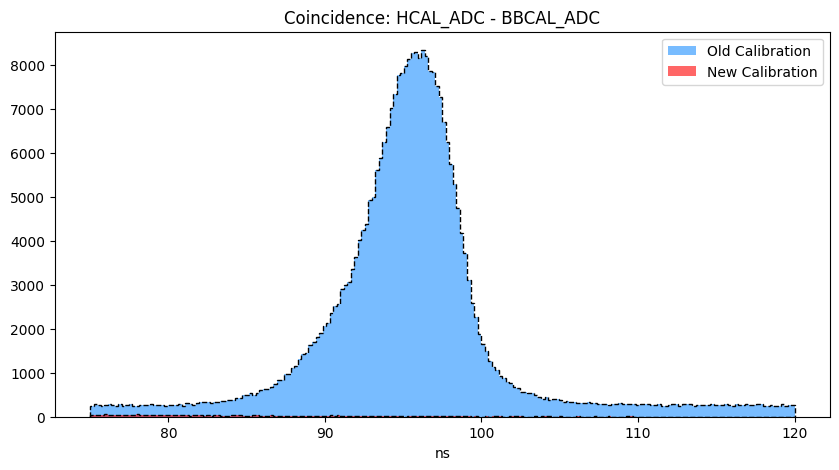

In [87]:
plt.figure(figsize=(10, 5))

coincidence = plt.hist(adc_array - bbtime_array, range=(75, 120), bins=200, color='dodgerblue', alpha=0.6, label="Old Calibration", histtype='stepfilled')
plt.hist(adc_array - bbtime_array, range=(75, 120), bins=200, color='black', linestyle='--', histtype='step')

newCoincidence = plt.hist(adc_arrayNew-133 - bbtime_arrayNew + 130, bins=200, range=(75, 120), color='red', alpha=0.6, label="New Calibration", histtype='stepfilled')
plt.hist(adc_arrayNew-133 - bbtime_arrayNew + 130, bins=200, range=(75, 120), color='black', linestyle='--', histtype='step')

plt.legend(loc='upper right')
plt.title("Coincidence: HCAL_ADC - BBCAL_ADC")
plt.xlabel("ns")

plt.show()


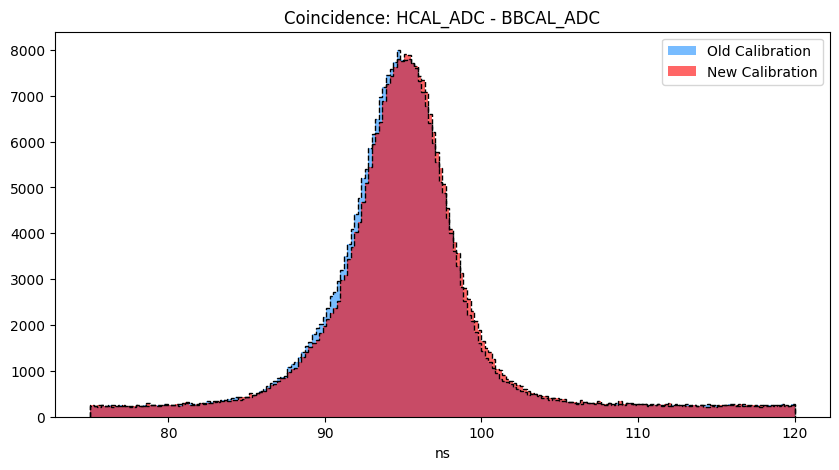

In [88]:
plt.figure(figsize=(10, 5))

coincidence = plt.hist(tdc_array - bbtime_array+125.5, range=(75, 120), bins=200, color='dodgerblue', alpha=0.6, label="Old Calibration", histtype='stepfilled')
plt.hist(tdc_array - bbtime_array+125.5, range=(75, 120), bins=200, color='black', linestyle='--', histtype='step')

newCoincidence = plt.hist(tdc_arrayNew - bbtime_arrayNew + 130, bins=200, range=(75, 120), color='red', alpha=0.6, label="New Calibration", histtype='stepfilled')
plt.hist(tdc_arrayNew - bbtime_arrayNew + 130, bins=200, range=(75, 120), color='black', linestyle='--', histtype='step')

plt.legend(loc='upper right')
plt.title("Coincidence: HCAL_ADC - BBCAL_ADC")
plt.xlabel("ns")

plt.show()

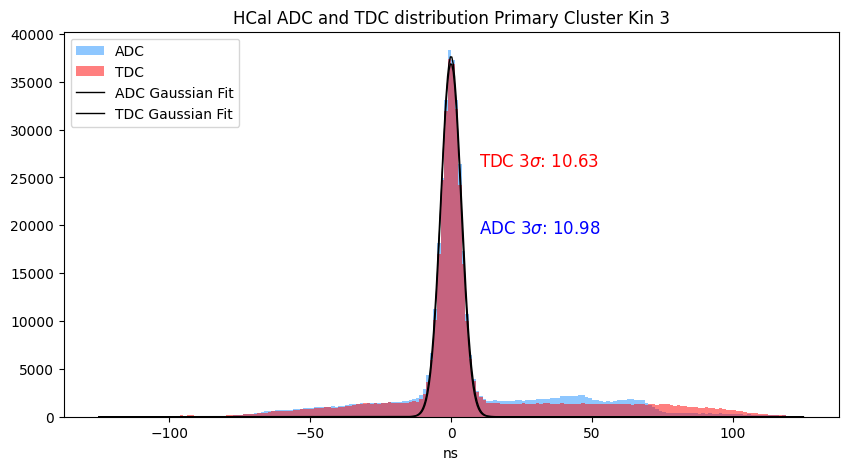

In [89]:


def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

def polynomial(x, a, b, c):
    return a * x**2 + b * x + c
plt.figure(figsize=(10,5))
adcHistNew = plt.hist(adc_arrayNew, bins=200, range=(-125, 125), color='dodgerblue', alpha=0.5, label="ADC")
tdcHistNew = plt.hist(tdc_arrayNew, bins=200, range=(-125, 125), color='red', alpha=0.5, label="TDC")

adc_counts, adc_bins = adcHistNew[0], adcHistNew[1]
tdc_counts, tdc_bins = tdcHistNew[0], tdcHistNew[1]

adc_bin_centers = (adc_bins[:-1] + adc_bins[1:]) / 2
tdc_bin_centers = (tdc_bins[:-1] + tdc_bins[1:]) / 2

adc_initial_guess = [max(adc_counts), adc_bin_centers[np.argmax(adc_counts)], np.std(adc_arrayNew)]
popt_gauss_adc, _ = curve_fit(gaussian, adc_bin_centers, adc_counts, p0=adc_initial_guess)
popt_poly_adc, _ = curve_fit(polynomial, adc_bin_centers, adc_counts)

tdc_initial_guess = [max(tdc_counts), tdc_bin_centers[np.argmax(tdc_counts)], np.std(tdc_arrayNew)]
popt_gauss_tdc, _ = curve_fit(gaussian, tdc_bin_centers, tdc_counts, p0=tdc_initial_guess)
popt_poly_tdc, _ = curve_fit(polynomial, tdc_bin_centers, tdc_counts)

x_adc = np.linspace(-125, 125, 500)
plt.plot(x_adc, gaussian(x_adc, *popt_gauss_adc), color='black', lw=1, label="ADC Gaussian Fit")

x_tdc = np.linspace(-125, 125, 500)
plt.plot(x_tdc, gaussian(x_tdc, *popt_gauss_tdc), color='black', lw=1, label="TDC Gaussian Fit")

plt.text(10, max(adc_counts)*0.5, f"ADC 3$\sigma$: {abs(3*popt_gauss_adc[2]):.2f}", color='blue', fontsize=12)
plt.text(10, max(tdc_counts)*0.7, f"TDC 3$\sigma$: {abs(3*popt_gauss_tdc[2]):.2f}", color='red', fontsize=12)

plt.title("HCal ADC and TDC distribution Primary Cluster Kin 3")
plt.xlabel("ns")
plt.legend(loc="upper left")
plt.show()


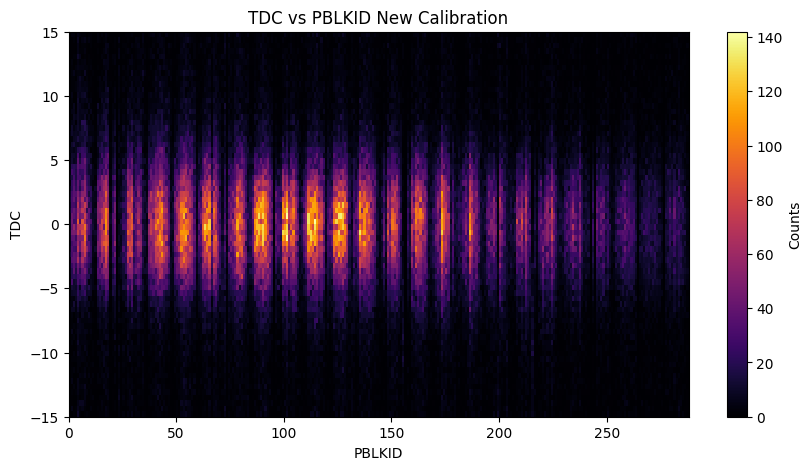

In [90]:
plt.figure(figsize=(10,5))
plt.hist2d(pblkid_arrayNew, tdc_arrayNew, bins=[288, 70], range=[[0, 288], [-15, 15]], cmap='inferno')

plt.colorbar(label='Counts')

plt.xlim(0, 288)
plt.ylim(-15, 15)

plt.xlabel('PBLKID')
plt.ylabel('TDC')
plt.title('TDC vs PBLKID New Calibration')

plt.show()


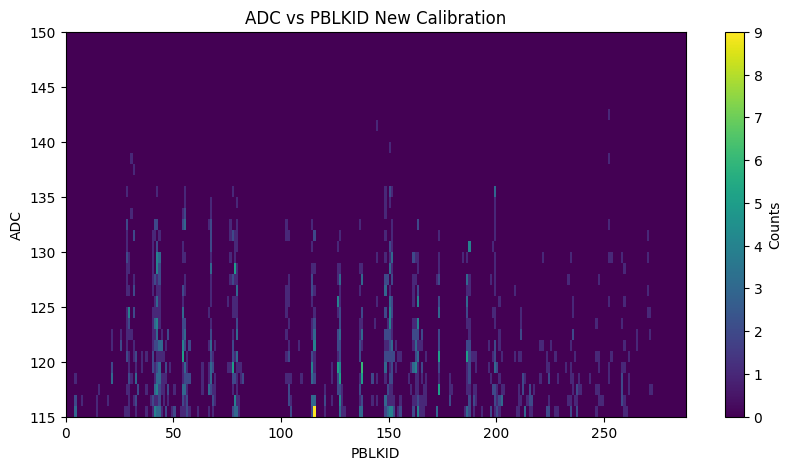

In [91]:
plt.figure(figsize=(10,5))
plt.hist2d(pblkid_arrayNew, adc_arrayNew, bins=[288, 35], range=[[0, 288], [115, 150]], cmap='viridis')

plt.colorbar(label='Counts')

plt.xlim(0, 288)
#plt.ylim(-15, 15)

plt.xlabel('PBLKID')
plt.ylabel('ADC')
plt.title('ADC vs PBLKID New Calibration')

plt.show()


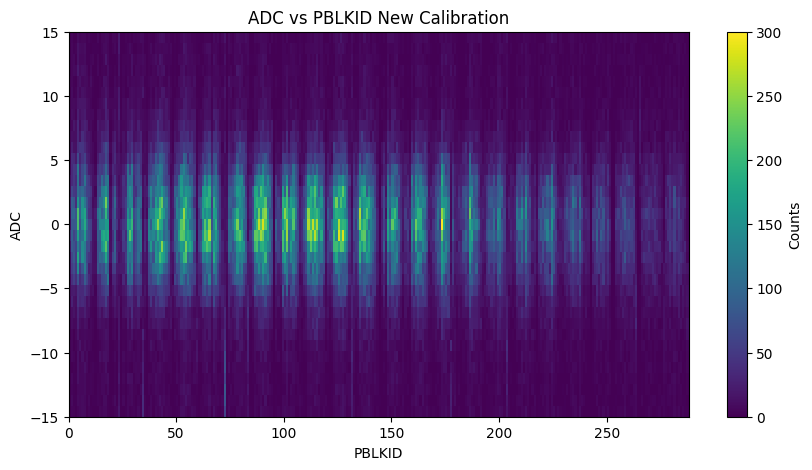

In [93]:
plt.figure(figsize=(10,5))
plt.hist2d(pblkid_arrayNew, adc_arrayNew, bins=[288, 35], range=[[0, 288], [-15, 15]], cmap='viridis')

plt.colorbar(label='Counts')

plt.xlim(0, 288)
#plt.ylim(-15, 15)

plt.xlabel('PBLKID')
plt.ylabel('ADC')
plt.title('ADC vs PBLKID New Calibration')

plt.show()


In [ ]:
#tdc_array
#pblkid_array
#old_offset
#final_offset


newTDC_array=[]



# Initialize 288 histograms
histogramsNew = [[] for _ in range(288)]


# Fill the histograms
for pblkid, tdc_value in zip(pblkid_array, tdc_array):
    # pblkid ranges from 1 to 288, so subtract 1 to make it 0-indexed
    try:
        histogramsNew[pblkid - 1].append(tdc_value-old_offset[pblkid-1]+final_offset[pblkid-1])
    except:
        print("Error wtih pblkid")


In [ ]:
tdc_array[2]-old_offset[2]+final_offset[2]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

num_bins = 20

rows, cols = 24, 12

fig, axes = plt.subplots(rows, cols, figsize=(20, 40),dpi=300)  # Adjust figsize for better visibility

mean_arrayNew = []

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j  # Calculate the index for the histogram
        ax = axes[i, j]
        
        counts, bin_edges, _ = ax.hist(histogramsNew[idx], bins=100, range=(-200, 200), color='blue', alpha=0.7)
        
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        filtered_indices = counts > 10
        filtered_counts = counts[filtered_indices]
        filtered_bin_centers = bin_centers[filtered_indices]
        
        if len(filtered_counts) > 0:
            initial_guess = [max(filtered_counts), filtered_bin_centers[np.argmax(filtered_counts)], np.std(histogramsNew[idx])]
            
            try:
                popt, _ = curve_fit(gaussian, filtered_bin_centers, filtered_counts, p0=initial_guess)
                
                mean_value = popt[1]
                mean_arrayNew.append(mean_value)
                
                ax.plot(bin_centers, gaussian(bin_centers, *popt), color='red', lw=2)
                
                
                ax.set_title(f"TDC BLK {idx+1}\nMean: {mean_value:.2f}")
            except Exception as e:
                print(e)
                mean_arrayNew.append(100)
                ax.set_title(f"TDC BLK {idx+1}\nFit Failed")
        else:
            mean_arrayNew.append(100)
            ax.set_title(f"TDC BLK {idx+1}\nInsufficient Data")
        ax.set_ylim(0, 300)
        ax.set_xticks([])  # Optional: Remove x-ticks for cleaner layout
        ax.set_yticks([])  # Optional: Remove y-ticks for cleaner layout

plt.tight_layout()
plt.savefig("high_res_histograms.png", dpi=300)

plt.show()


In [ ]:
#plt.hist(histogramsNew[40], bins=100, range=(-200, 200), color='blue', alpha=0.7)

# Idividual

In [ ]:
counts, bin_edges, _ = plt.hist(histograms[40], bins=100,range=(-200,200), color='blue', alpha=0.7)
 

# Results

In [ ]:
plt.plot(mean_array,'.')
plt.title('Current Calibration Pass1 GEN3')
plt.ylabel("gaussian mean for each channel")
plt.xlabel("block id")
plt.ylim(-10,10)

In [ ]:
plt.plot(mean_arrayNew,'.')
plt.title('New Calibration Pass1 GEN3')
plt.ylabel("gaussian mean for each channel")
plt.xlabel("block id")
plt.ylim(-10,10)